# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [1]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import seaborn as sns
import torch.optim as optim
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

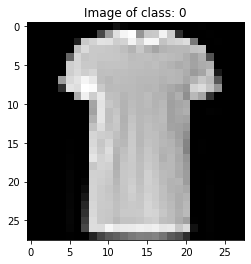

In [3]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [4]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [5]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [6]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


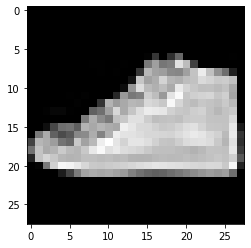

Label: 7


In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [8]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cuda")
device

device(type='cuda')

# Task 2:

Create a Neural Network

In [9]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Task 3:

Specify loss and optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
train_losses, test_losses, train_accuracy = [], [], []
print(len(training_data))

60000


# Task 3:

Train model using for loop

In [11]:
preds = torch.tensor([])
true_vals = torch.tensor([])

for e in range(epochs):
    running_loss = 0
    for images, labels in train_dataloader:
    # Flatten Fashion-MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
    # Training pass
        optimizer.zero_grad()
    
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
        model.eval()
      
      # Validation pass
        for images, labels in test_dataloader:
            true_vals = torch.cat((true_vals, labels), 0)
            images = images.view(1, 784)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
        
            ps = torch.exp(log_ps)
            _, pred_label = torch.max(ps, dim = 1)
            preds = torch.cat((preds, pred_label), 0)
            top_p, top_class = ps.topk(1, dim = 1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            if (e == 0):
                true_values = true_vals
                predictions = preds
                
    
    model.train()
    train_losses.append(running_loss/len(train_dataloader))
    test_losses.append(test_loss/len(test_dataloader))
    train_accuracy.append(accuracy/len(test_dataloader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_dataloader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_dataloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_dataloader)))

Epoch: 1/20.. Training loss: 0.599.. Test loss: 0.438.. Test Accuracy: 0.842
Epoch: 2/20.. Training loss: 0.425.. Test loss: 0.406.. Test Accuracy: 0.850
Epoch: 3/20.. Training loss: 0.386.. Test loss: 0.380.. Test Accuracy: 0.857
Epoch: 4/20.. Training loss: 0.366.. Test loss: 0.360.. Test Accuracy: 0.874
Epoch: 5/20.. Training loss: 0.349.. Test loss: 0.359.. Test Accuracy: 0.870
Epoch: 6/20.. Training loss: 0.335.. Test loss: 0.353.. Test Accuracy: 0.874
Epoch: 7/20.. Training loss: 0.327.. Test loss: 0.339.. Test Accuracy: 0.881
Epoch: 8/20.. Training loss: 0.317.. Test loss: 0.334.. Test Accuracy: 0.883
Epoch: 9/20.. Training loss: 0.308.. Test loss: 0.342.. Test Accuracy: 0.877
Epoch: 10/20.. Training loss: 0.305.. Test loss: 0.350.. Test Accuracy: 0.880
Epoch: 11/20.. Training loss: 0.296.. Test loss: 0.333.. Test Accuracy: 0.882
Epoch: 12/20.. Training loss: 0.292.. Test loss: 0.367.. Test Accuracy: 0.874
Epoch: 13/20.. Training loss: 0.284.. Test loss: 0.332.. Test Accuracy: 0

# Task 4:

Report accuracy from train set, and test set independently

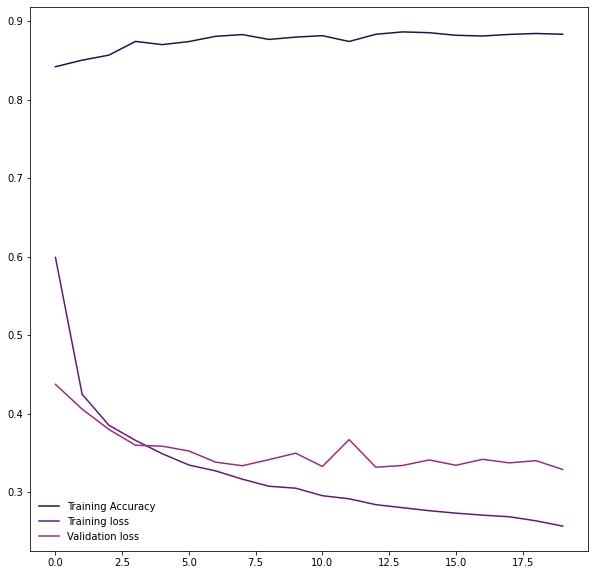

In [12]:
sns.set_palette("magma")
fig = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label = "Training Accuracy")
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

In [13]:
print(true_values)
print(len(true_values))
print(predictions)
print(len(predictions))



tensor([9., 2., 1.,  ..., 8., 1., 5.])
10000
tensor([9., 2., 1.,  ..., 8., 1., 5.])
10000


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

Confusion Matrix: 



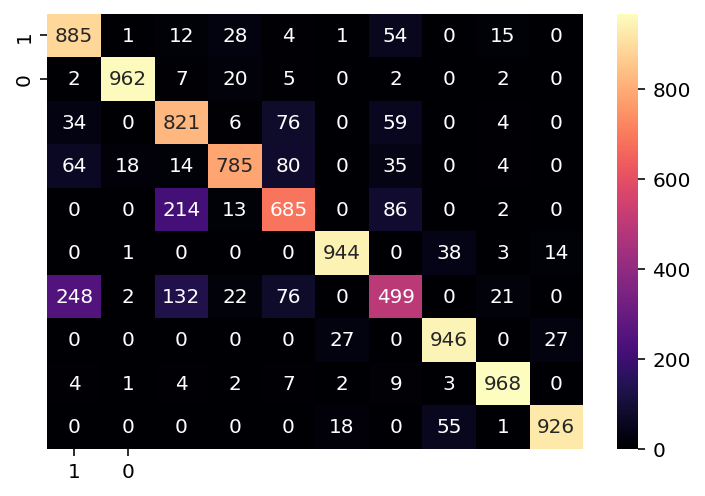

In [19]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: \n")
#confusion = confusion_matrix(true_values, predictions)
#print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", yticklabels=[1, 0], xticklabels=[1, 0], cmap="magma")
plt.show()

In [15]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

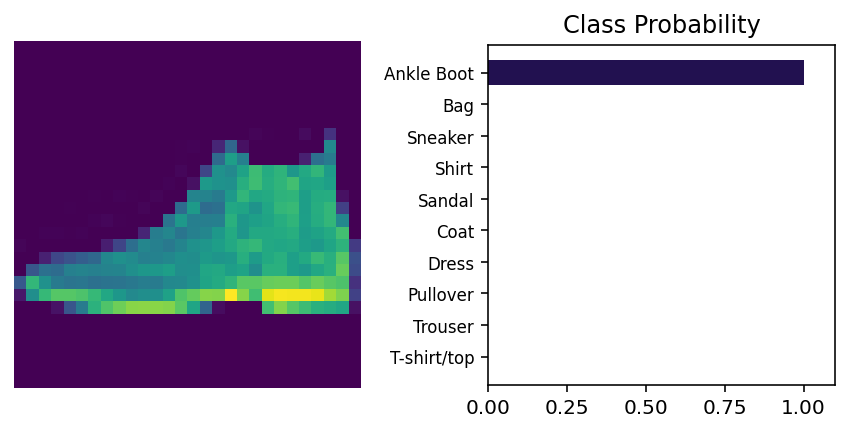

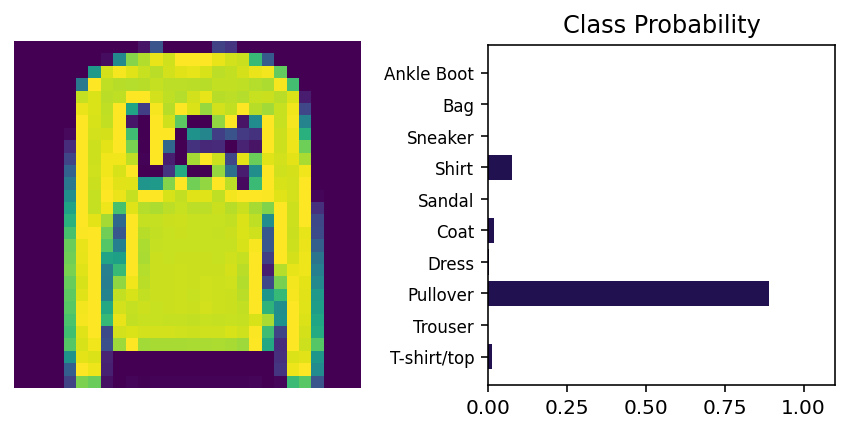

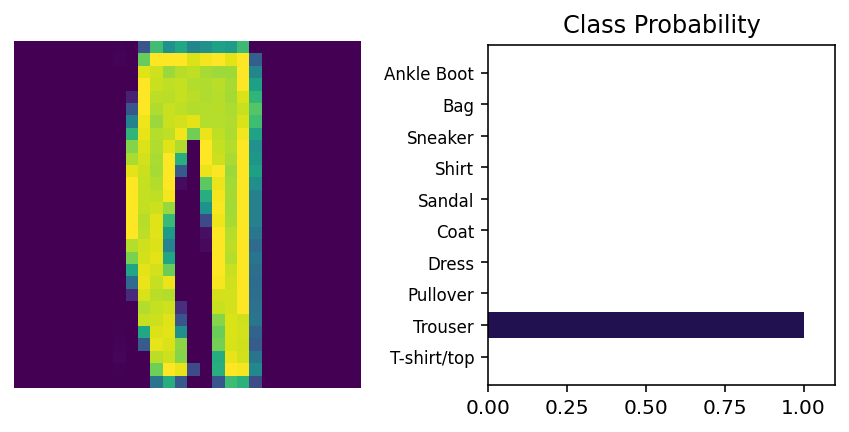

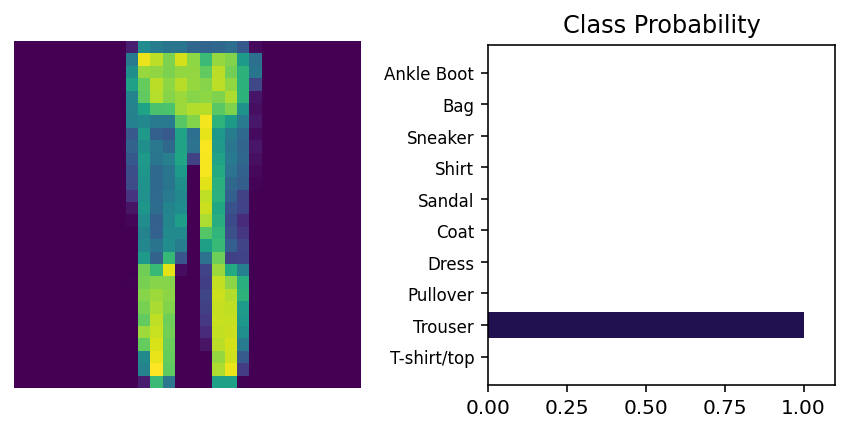

In [25]:
import numpy as np
dataiter = iter(test_dataloader)

%config InlineBackend.figure_format = 'retina'
for i in range(4):
    images, labels = dataiter.next()
    img = images[0]
    img = img.resize_(1, 784)
    ps = torch.exp(model(img))

    view_classify(img, ps, version='Fashion')

# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [27]:
from sklearn.linear_model import LogisticRegression

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

lr = LogisticRegression()
lr.fit(train, train_labels)

predicts = lr.predict(test)
acurracy = (predicts == test_labels).sum() / len(predicts)
print("Logistic Regression Accuracy ", (acurracy * 100))

Logistic Regression Accuracy  84.11999999999999


c:\users\vanov\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

dt = DecisionTreeClassifier()
dt.fit(train, train_labels)

predicts = dt.predict(test)
acurracy = (predicts == test_labels).sum() / len(predicts)
print("Decision Tree Accuracy ", (acurracy * 100))

Decision Tree Accuracy  78.83
